In [51]:
import pints
import pandas as pd
import numpy as np
import epipi
import pints.plot
import matplotlib.pyplot as plt
import scipy.stats

In [52]:
theta = pd.read_csv('../EpiOS/y_interpolated.csv')['y_interpolated'].values
omega = pd.read_csv('../EpiOS/omega.csv')['omega'].values
I_full = pd.read_csv('../EpiOS/incidences_true.csv')['incidences_true'].values
I_true = np.array([np.arange(len(I_full)), I_full])
np.shape(I_true)
cols_to_delete = [40]
I_true = np.delete(I_true, cols_to_delete, axis=1)
I_true = I_true.tolist()

In [37]:
log_prior_list = [pints.UniformLogPrior(0, 10000) for _ in range(len(cols_to_delete))]
log_prior_list.append(pints.TruncatedGaussianLogPrior(0, 1, 0.1, np.inf))
log_prior = pints.ComposedLogPrior(*log_prior_list)
log_posterior = pints.LogPosterior(epipi.PredictIncidenceGivenTrueLogPDF(theta, omega, I_true, cols_to_delete), log_prior)
y_inter_init1 = np.array(list(np.random.randint(0, 2000, size=len(cols_to_delete))) + [10])
y_inter_init2 = np.array(list(np.random.randint(0, 2000, size=len(cols_to_delete))) + [15])
y_inter_init3 = np.array(list(np.random.randint(0, 2000, size=len(cols_to_delete))) + [5])
init = [y_inter_init1, y_inter_init2, y_inter_init3]
mcmc = pints.MCMCController(
    log_posterior, 3, init, method=pints.NoUTurnMCMC)
# mcmc.set_max_iterations(1000)
chains = mcmc.run()

/var/folders/5q/gy5_gx0s17j9qlczj9knlfwm0000gn/T/ipykernel_54739/818129728.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior_list = [pints.UniformLogPrior(0, 10000) for _ in range(len(cols_to_delete))]


2
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0.5        0:00.0
2     9      0         0.667     0.667      0:00.0
3     12     0.25      0.75      0.5        0:00.0
20    63     0.476     0.524     0.667      0:00.0
40    123    0.561     0.488     0.585      0:00.1
60    183    0.525     0.525     0.607      0:00.1
80    243    0.531     0.481     0.605      0:00.1
100   303    0.505     0.505     0.614      0:00.1
120   363    0.504     0.504     0.612      0:00.1
140   423    0.56      0.475     0.61       0:00.1
160   483    0.547     0.466     0.571      0:00.2
180   543    0.541     0.459     0.58       0:00.2
Initial phase completed.
200   603    0.527     0.473     0.592      0:00.2
220   663    0.534     0.471     0.566      0:00.2
240   723    0.49      0.452     0.519      0:00.2
260   783 

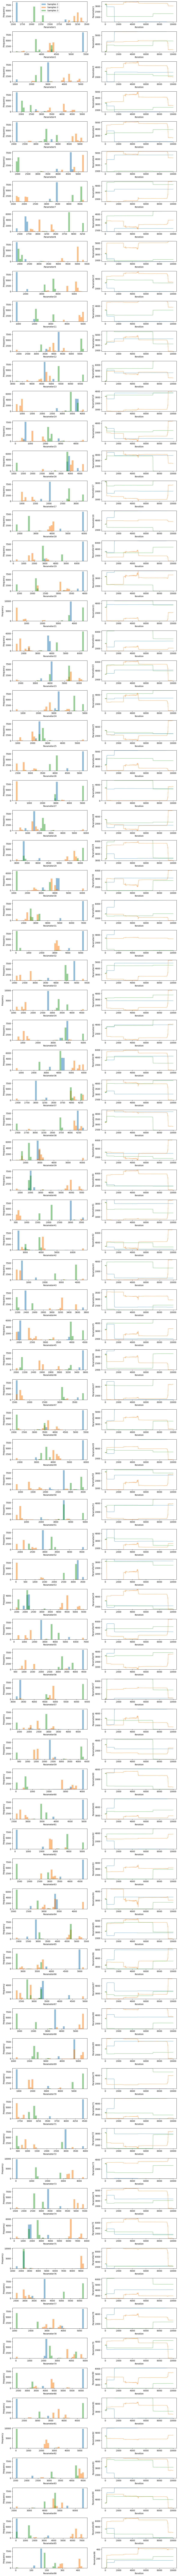

In [106]:
pints.plot.trace(results)
plt.show()

In [39]:
pints.rhat(chains[2])

/Users/yunliqi/mambaforge/envs/limited-resources/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/yunliqi/mambaforge/envs/limited-resources/lib/python3.11/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


nan

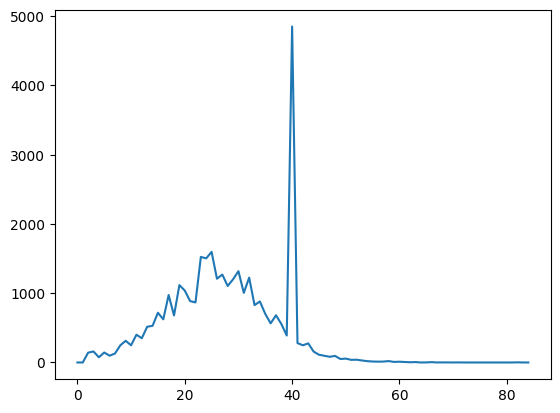

In [40]:
chain = chains[0]
chain = chain[8000:]
chain_mean = np.mean(chain, axis=0)
I = np.zeros(len(theta))
counter = 0
for i in range(len(theta)):
    if i in I_true[0]:
        I[i] = I_true[1][I_true[0].index(i)]
    else:
        I[i] = chain_mean[counter]
        counter += 1
plt.plot(I)

In [41]:
lower = [0] * (len(cols_to_delete) + 1)
upper = [10000] * len(cols_to_delete) + [100]
boundaries = pints.RectangularBoundaries(lower, upper)
x0 = np.array([100] * len(cols_to_delete) + [1])
log_prior_list = [pints.UniformLogPrior(0, 10000) for _ in range(len(cols_to_delete))]
log_prior_list.append(pints.TruncatedGaussianLogPrior(0, 1, 0.1, np.inf))
log_prior = pints.ComposedLogPrior(*log_prior_list)
log_posterior = pints.LogPosterior(epipi.PredictIncidenceGivenTrueLogPDF(theta, omega, I_true, cols_to_delete), log_prior)
found_parameters, found_value = pints.optimise(
    # epipi.PredictIncidenceLogPDF(theta, omega),
    log_posterior,
    x0,
    boundaries=boundaries,
    method=pints.NelderMead,
    )

2
Maximising LogPDF
Using Nelder-Mead
Running in sequential mode.
Iter. Eval. Best      Current   Time m:s
0     3     -6.21e+07 -6.21e+07   0:00.0
1     4     -5.92e+07 -5.92e+07   0:00.0
2     5     -5.92e+07 -5.92e+07   0:00.0
3     6     -5.77e+07 -5.77e+07   0:00.0
20    23    -6660619  -6660619    0:00.0
40    43    -92483.61 -92483.61   0:00.0
60    63    -92062.14 -92062.14   0:00.0
80    83    -92050.92 -92050.92   0:00.0
100   103   -92050.9  -92050.9    0:00.0
120   123   -92050.9  -92050.9    0:00.0
140   143   -92050.9  -92050.9    0:00.1
160   166   -92050.9  -92050.9    0:00.1
180   191   -92050.9  -92050.9    0:00.1
200   215   -92050.9  -92050.9    0:00.1
220   239   -92050.9  -92050.9    0:00.1
240   263   -92050.9  -92050.9    0:00.1
260   288   -92050.9  -92050.9    0:00.1
280   315   -92050.9  -92050.9    0:00.1
300   342   -92050.9  -92050.9    0:00.1
320   368   -92050.9  -92050.9    0:00.1
340   395   -92050.9  -92050.9    0:00.1
360   422   -92050.9  -92050.9  

/var/folders/5q/gy5_gx0s17j9qlczj9knlfwm0000gn/T/ipykernel_54739/1734790773.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior_list = [pints.UniformLogPrior(0, 10000) for _ in range(len(cols_to_delete))]
/Users/yunliqi/mambaforge/envs/limited-resources/lib/python3.11/site-packages/pints/_optimisers/_nelder_mead.py:135: UserWarning: Nelder-Mead optimisation does not support boundaries.
  warnings.warn(


In [59]:
ws_mean = 7
ws_var = 5**2
theta_num = ws_var / ws_mean
k = ws_mean / theta_num
w_dist = scipy.stats.gamma(k, scale=theta_num)
disc_w = w_dist.pdf(np.arange(len(theta)))
omega = disc_w * 7.5

In [ ]:
poisson_model = """
functions {
    real effective_no_infectives (
        int N, int S, int t, array [] real aI, array [] real aOmega) {
            real mean;
            if(t > S) {
                mean = (
                    dot_product(aI[(t-S):(t-1)], aOmega));
            }
            else {
                mean = (
                    dot_product(aI[:(t-1)], aOmega[(S-t+2):]));
            }
            return mean;
    }
}
data {
    int N; // number of days
    int S; // length omega
    array [N] real Theta; // local prevalence for N days
    array [S] real revOmega; // reversed PCR positive probability
}
parameters {
    array [N] real<lower=0> I; // local incidence for N days
    real<lower=0> sigma; // variance of the log-normal distribution
}
model {
    for(t in 1:N) {
        if (effective_no_infectives(N, S, t, I, revOmega) != 0) {
            Theta[t] ~ normal (
                effective_no_infectives(
                    N, S, t, I, revOmega), sigma); // likelihood
                }
    }
    sigma ~ uniform(0, 1); // prior of sigma
}
"""
poisson_data = {
    'N': len(theta),
    'S': len(omega),
    'Theta': theta, #  change to frequency
    'revOmega': omega[::-1]}

posterior = stan.build(poisson_model, data=poisson_data, random_seed=10)
fit = posterior.sample(num_chains=3, num_samples=1000)

# Assuming time_sample correctly indexes the days for 'I' and 'Theta'
samples = az.from_pystan(
    posterior=fit,
    observed_data='Theta',  # Use 'Theta' as the observed data
    coords={'observation': list(range(max(time_sample) + 1))},  # 'covariate' removed
    dims={'Theta': ['observation'], 'I': ['observation']}  # Adjusted dims
)

In [99]:
class PoissonModel(pints.ForwardModel):
    def __init__(self, S, revOmega):
        super().__init__()
        self.S = S
        self.revOmega = revOmega

    def n_parameters(self):
        # The number of parameters is N (for 'I') + 1 (for 'sigma')
        # This should match the length of 'revOmega' (assuming 'revOmega' is of length N) + 1 for 'sigma'
        return len(self.revOmega)
    
    def simulate(self, parameters, times):
        N = len(times)
        # Ensure 'parameters' is split correctly between 'I' and 'sigma'
        I = parameters
        Theta_pred = np.zeros(N)
        
        for t in range(1, N + 1):
            effective_I = 0
            if t > self.S:
                effective_I = np.dot(I[(t-self.S):(t-1)], self.revOmega)
            else:
                effective_I = np.dot(I[:(t-1)], self.revOmega[(self.S-t+1):])
            Theta_pred[t-1] = effective_I
        
        return Theta_pred



In [104]:
# Assuming 'observed_data' is your observed 'Theta'
# 'times' should be an array indicating the time points, which in this case could be the indices of 'Theta'
model = PoissonModel(S=len(omega[::-1]), revOmega=omega[::-1])
problem = pints.SingleOutputProblem(model, list(range(len(theta))), theta)
log_likelihood = pints.GaussianLogLikelihood(problem)
log_prior_list = [pints.TruncatedGaussianLogPrior(5000, 1700, 0, np.inf) for _ in range(len(theta))]
log_prior_list.append(pints.TruncatedGaussianLogPrior(0, 1, 0, np.inf))
log_prior = pints.ComposedLogPrior(*log_prior_list)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

In [105]:
# Set initial guesses for 'I' and 'sigma'
# Assuming some initial guess is available for 'I', else use a reasonable substitute
initial_I_guess = np.mean(theta) * np.ones(len(theta))  # Placeholder
initial_sigma_guess = 1  # Placeholder, adjust based on your knowledge of the data
initial_guess = np.append(initial_I_guess, initial_sigma_guess)

# Select an inference method, e.g., MCMC
n_chains = 3
n_iterations = 10000  # Adjust based on convergence needs
mcmc = pints.MCMCController(log_posterior, n_chains, [initial_guess for _ in range(n_chains)])
mcmc.set_max_iterations(n_iterations)

# Running MCMC
print("Running MCMC...")
results = mcmc.run()

# Extracting inferred 'I' and 'sigma'
# Assuming use of first chain here for simplicity, consider chain convergence and mixing in practice
inferred_I = results[0][:, :-1]  # All but last column for 'I'
inferred_sigma = results[0][:, -1]  # Last column for 'sigma'


Running MCMC...
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0.5       0.5       0.5        0:00.1
2     9      0.667     0.667     0.667      0:00.1
3     12     0.75      0.75      0.75       0:00.1
20    63     0.81      0.524     0.524      0:00.5
40    123    0.683     0.415     0.561      0:00.9
60    183    0.607     0.475     0.541      0:01.2
80    243    0.63      0.481     0.593      0:01.6
100   303    0.594     0.495     0.594      0:01.9
120   363    0.562     0.537     0.57       0:02.3
140   423    0.553     0.539     0.546      0:02.6
160   483    0.552795  0.534     0.559      0:03.0
180   543    0.514     0.519337  0.564      0:03.4
Initial phase completed.
200   603    0.517     0.522     0.557      0:03.8
220   663    0.516     0.520362  0.534      0:04.5
240   723    0.494     0.494     0.535      0:0

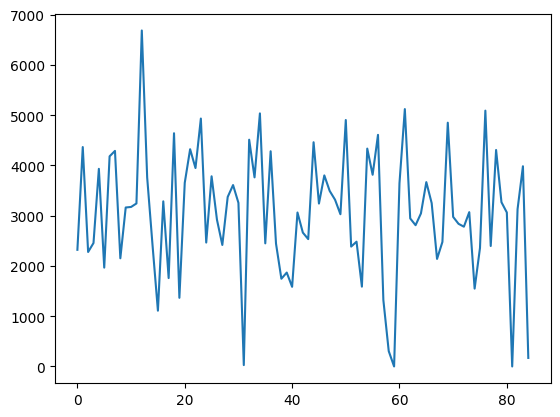

In [107]:
chain = results[2]
chain = chain[8000:]
chain_mean = np.mean(chain, axis=0)
plt.plot(chain_mean[:-1])
# plt.plot(y_inter_init[:-1])
plt.show()